### Plotting relative AAs and PTMs in PEAKS DN and PeaksDB results for Trocas7 incubation samples

Starting with:

    Peaks de novo results of PTM-optimized sequencing
    PeaksDB de novo-assisted results from PTM-optimized database searches

Goal:

    Figures comparing the modifcation type and extent in database and de novo peptides
    
Using:

    - pandas
    - matplotlib
    - numpy

In [2]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [3]:
cd /home/millieginty/Documents/git-repos/amazon/data/Trocas7-incubations/

/home/millieginty/Documents/git-repos/amazon/data/Trocas7-incubations


### NAAF-corrected residue modification and AA composition across sample set

In [44]:
# for each of the 16 treatments:
# read in NAAF totals that are combinations of PeaksDB and PeaksDN (see NAAF-combination nb)

# Macapa South
MS_sum_110 = pd.read_csv("processed/NAAF-sums/NAAF-sum-110.csv")
MS_sum_210 = pd.read_csv("processed/NAAF-sums/NAAF-sum-210.csv")
MS_sum_310 = pd.read_csv("processed/NAAF-sums/NAAF-sum-310.csv")
MS_sum_410 = pd.read_csv("processed/NAAF-sums/NAAF-sum-410.csv")


frames = [MS_sum_110, MS_sum_210, MS_sum_310, MS_sum_410]
index = ['1. MS_T00_GF', '2. MS_T00_GD', '3. MS_T24_GF', '4. MS_T24_GD']

# concatenate dataframes
MS_tot = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
MS_tot = MS_tot.loc[:, ~MS_tot.columns.str.contains('^Unnamed')]

# reindex with sample names
names = ['T0 0.3-0.7 um', 'T0 >0.7 um', 'T24 0.3-0.7 um', 'T24 >0.7 um']
MS_tot.insert(loc=0, column='sample', value=names)
MS_tot.set_index('sample')

# separate out the dataframe into AAs and %PTMs, too
MS_sum_AA = MS_tot[['sample', 'A-NAAF', 'C-NAAF', 'D-NAAF', 'E-NAAF', 'F-NAAF', 'G-NAAF', 'H-NAAF', 'I-NAAF', 'K-NAAF', \
              'L-NAAF', 'M-NAAF', 'N-NAAF', 'P-NAAF', 'Q-NAAF', 'R-NAAF', 'S-NAAF', 'T-NAAF', 'V-NAAF', \
              'W-NAAF', 'Y-NAAF']].copy()

MS_sum_ptm = MS_tot[['sample', 'Cys. w/ carb.', 'Met. w/ oxid.', 'Asn. w/ deam.', 'Glu. w/ deam.', 'Overall modified']].copy()


MS_sum_ptm.head()

sample  Cys. w/ carb.  Met. w/ oxid.  Asn. w/ deam.  Glu. w/ deam.  \
0   T0 0.3-0.7 um            1.0       0.686575       0.094981       0.057176   
1      T0 >0.7 um            1.0       0.312601       0.230461       0.522221   
2  T24 0.3-0.7 um            1.0       0.148148       0.010817       0.034806   
3     T24 >0.7 um            1.0       0.256142       0.031715       0.174783   

   Overall modified  
0          0.130534  
1          0.064196  
2          0.011357  
3          0.015620

In [43]:
# for each of the 16 treatments:
# read in NAAF totals that are combinations of PeaksDB and PeaksDN (see NAAF-combination nb)

# Macapa North
MN_sum_126 = pd.read_csv("processed/NAAF-sums/NAAF-sum-126.csv")
MN_sum_226 = pd.read_csv("processed/NAAF-sums/NAAF-sum-226.csv")
MN_sum_318 = pd.read_csv("processed/NAAF-sums/NAAF-sum-318.csv")
MN_sum_417 = pd.read_csv("processed/NAAF-sums/NAAF-sum-417.csv")


frames = [MN_sum_126, MN_sum_226, MN_sum_318, MN_sum_417]
index = ['1. MS_T00_GF', '2. MS_T00_GD', '3. MS_T24_GF', '4. MS_T24_GD']

# concatenate dataframes
MN_tot = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
MN_tot = MN_tot.loc[:, ~MN_tot.columns.str.contains('^Unnamed')]

# reindex with sample names
names = ['T0 0.3-0.7 um', 'T0 >0.7 um', 'T24 0.3-0.7 um', 'T24 >0.7 um']
MN_tot.insert(loc=0, column='sample', value=names)
MN_tot.set_index('sample')

# separate out the dataframe into AAs and %PTMs, too
MN_sum_AA = MN_tot[['sample', 'A-NAAF', 'C-NAAF', 'D-NAAF', 'E-NAAF', 'F-NAAF', 'G-NAAF', 'H-NAAF', 'I-NAAF', 'K-NAAF', \
              'L-NAAF', 'M-NAAF', 'N-NAAF', 'P-NAAF', 'Q-NAAF', 'R-NAAF', 'S-NAAF', 'T-NAAF', 'V-NAAF', \
              'W-NAAF', 'Y-NAAF']].copy()

MN_sum_ptm = MN_tot[['sample', 'Cys. w/ carb.', 'Met. w/ oxid.', 'Asn. w/ deam.', 'Glu. w/ deam.', 'Overall modified']].copy()


MN_sum_ptm.head()

sample  Cys. w/ carb.  Met. w/ oxid.  Asn. w/ deam.  Glu. w/ deam.  \
0   T0 0.3-0.7 um            1.0       0.072390       0.018988       0.467456   
1      T0 >0.7 um            1.0       0.353521       0.101870       0.095711   
2  T24 0.3-0.7 um            1.0       0.387675       0.127555       0.042738   
3     T24 >0.7 um            1.0       0.591274       0.044580       0.630554   

   Overall modified  
0          0.004083  
1          0.021412  
2          0.082407  
3          0.016324

In [41]:
# for each of the 16 treatments:
# read in NAAF totals that are combinations of PeaksDB and PeaksDN (see NAAF-combination nb)

# Chaves
CV_sum_106 = pd.read_csv("processed/NAAF-sums/NAAF-sum-106.csv")
CV_sum_206 = pd.read_csv("processed/NAAF-sums/NAAF-sum-206.csv")
CV_sum_306 = pd.read_csv("processed/NAAF-sums/NAAF-sum-306.csv")
CV_sum_406 = pd.read_csv("processed/NAAF-sums/NAAF-sum-406.csv")


frames = [CV_sum_106, CV_sum_206, CV_sum_306, CV_sum_406]
index = ['1. MS_T00_GF', '2. MS_T00_GD', '3. MS_T24_GF', '4. MS_T24_GD']

# concatenate dataframes
CV_tot = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
CV_tot = CV_tot.loc[:, ~CV_tot.columns.str.contains('^Unnamed')]

# reindex with sample names
names = ['T0 0.3-0.7 um', 'T0 >0.7 um', 'T24 0.3-0.7 um', 'T24 >0.7 um']
CV_tot.insert(loc=0, column='sample', value=names)
CV_tot.set_index('sample')

# separate out the dataframe into AAs and %PTMs, too
CV_sum_AA = CV_tot[['sample', 'A-NAAF', 'C-NAAF', 'D-NAAF', 'E-NAAF', 'F-NAAF', 'G-NAAF', 'H-NAAF', 'I-NAAF', 'K-NAAF', \
              'L-NAAF', 'M-NAAF', 'N-NAAF', 'P-NAAF', 'Q-NAAF', 'R-NAAF', 'S-NAAF', 'T-NAAF', 'V-NAAF', \
              'W-NAAF', 'Y-NAAF']].copy()

CV_sum_ptm = CV_tot[['sample', 'Cys. w/ carb.', 'Met. w/ oxid.', 'Asn. w/ deam.', 'Glu. w/ deam.', 'Overall modified']].copy()


CV_sum_ptm.head()

sample  Cys. w/ carb.  Met. w/ oxid.  Asn. w/ deam.  Glu. w/ deam.  \
0   T0 0.3-0.7 um            1.0       0.356624       0.154402       0.222035   
1      T0 >0.7 um            1.0       0.258526       0.068865       0.210845   
2  T24 0.3-0.7 um            1.0       0.233311       0.045349       0.489118   
3     T24 >0.7 um            1.0       0.234577       0.034088       0.219486   

   Overall modified  
0          0.084896  
1          0.011184  
2          0.015597  
3          0.007392

In [42]:
# for each of the 16 treatments:
# read in NAAF totals that are combinations of PeaksDB and PeaksDN (see NAAF-combination nb)

# Baylique
BY_sum_102 = pd.read_csv("processed/NAAF-sums/NAAF-sum-102.csv")
BY_sum_202 = pd.read_csv("processed/NAAF-sums/NAAF-sum-202.csv")
BY_sum_302 = pd.read_csv("processed/NAAF-sums/NAAF-sum-302.csv")
BY_sum_402 = pd.read_csv("processed/NAAF-sums/NAAF-sum-402.csv")


frames = [BY_sum_102, BY_sum_202, BY_sum_302, BY_sum_402]
index = ['1. MS_T00_GF', '2. MS_T00_GD', '3. MS_T24_GF', '4. MS_T24_GD']

# concatenate dataframes
BY_tot = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
BY_tot = BY_tot.loc[:, ~BY_tot.columns.str.contains('^Unnamed')]

# reindex with sample names
names = ['T0 0.3-0.7 um', 'T0 >0.7 um', 'T24 0.3-0.7 um', 'T24 >0.7 um']
BY_tot.insert(loc=0, column='sample', value=names)
BY_tot.set_index('sample')

# separate out the dataframe into AAs and %PTMs, too
BY_sum_AA = BY_tot[['sample', 'A-NAAF', 'C-NAAF', 'D-NAAF', 'E-NAAF', 'F-NAAF', 'G-NAAF', 'H-NAAF', 'I-NAAF', 'K-NAAF', \
              'L-NAAF', 'M-NAAF', 'N-NAAF', 'P-NAAF', 'Q-NAAF', 'R-NAAF', 'S-NAAF', 'T-NAAF', 'V-NAAF', \
              'W-NAAF', 'Y-NAAF']].copy()

BY_sum_ptm = BY_tot[['sample', 'Cys. w/ carb.', 'Met. w/ oxid.', 'Asn. w/ deam.', 'Glu. w/ deam.', 'Overall modified']].copy()


BY_sum_ptm.head()

sample  Cys. w/ carb.  Met. w/ oxid.  Asn. w/ deam.  Glu. w/ deam.  \
0   T0 0.3-0.7 um            1.0       0.208913       0.136432       0.021091   
1      T0 >0.7 um            1.0       0.126643       0.015021       0.004451   
2  T24 0.3-0.7 um            1.0       0.135295       0.084352       0.043734   
3     T24 >0.7 um            1.0       0.267715       0.013544       0.050123   

   Overall modified  
0          0.037414  
1          0.003297  
2          0.027437  
3          0.007407

## 1. Peptide modifications across treatments:

<Figure size 720x360 with 0 Axes>

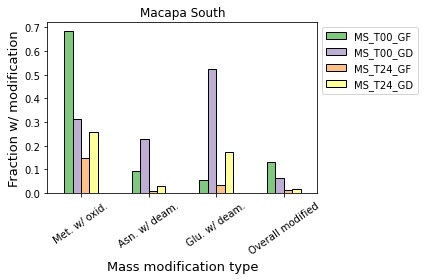

In [45]:
# plot mods across the dataset

MS_sum_ptm_s = MS_sum_ptm.drop(['sample'], axis=1)

ptm_MS_sumT = MS_sum_ptm_s.T

ptm_MS_sumT.columns = ['MS_T00_GF', 'MS_T00_GD', 'MS_T24_GF', 'MS_T24_GD']

four_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598']
six_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598', '#99d594', '#3288bd']
six_colors_q = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']
seven_colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']

fig = plt.figure(figsize = (10, 5)) 

ax = ptm_MS_sumT.iloc[1:11].plot(kind="bar", title = 'Macapa South', \
                             color = seven_colors, edgecolor = 'black')

plt.xticks(rotation=35)

ax.set_ylabel('Fraction w/ modification', fontsize = 13)
ax.set_xlabel('Mass modification type', fontsize = 13)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
#legend.get_frame().set_edgecolor('1.0')

plt.tight_layout()

#plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/NAAF-digested-PTM-combined.png", dpi = 300)


<Figure size 720x360 with 0 Axes>

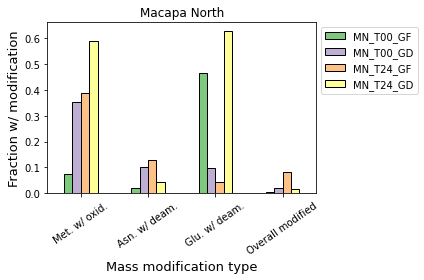

In [46]:
# plot mods across the dataset

MN_sum_ptm_s = MN_sum_ptm.drop(['sample'], axis=1)

ptm_MN_sumT = MN_sum_ptm_s.T

ptm_MN_sumT.columns = ['MN_T00_GF', 'MN_T00_GD', 'MN_T24_GF', 'MN_T24_GD']

four_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598']
six_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598', '#99d594', '#3288bd']
six_colors_q = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']
seven_colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']

fig = plt.figure(figsize = (10, 5)) 

ax = ptm_MN_sumT.iloc[1:11].plot(kind="bar", title = 'Macapa North', \
                             color = seven_colors, edgecolor = 'black')

plt.xticks(rotation=35)

ax.set_ylabel('Fraction w/ modification', fontsize = 13)
ax.set_xlabel('Mass modification type', fontsize = 13)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
#legend.get_frame().set_edgecolor('1.0')

plt.tight_layout()

#plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/NAAF-digested-PTM-combined.png", dpi = 300)


<Figure size 720x360 with 0 Axes>

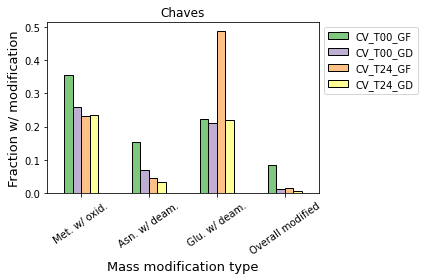

In [47]:
# plot mods across the dataset

CV_sum_ptm_s = CV_sum_ptm.drop(['sample'], axis=1)

ptm_CV_sumT = CV_sum_ptm_s.T

ptm_CV_sumT.columns = ['CV_T00_GF', 'CV_T00_GD', 'CV_T24_GF', 'CV_T24_GD']

four_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598']
six_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598', '#99d594', '#3288bd']
six_colors_q = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']
seven_colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']

fig = plt.figure(figsize = (10, 5)) 

ax = ptm_CV_sumT.iloc[1:11].plot(kind="bar", title = 'Chaves', \
                             color = seven_colors, edgecolor = 'black')

plt.xticks(rotation=35)

ax.set_ylabel('Fraction w/ modification', fontsize = 13)
ax.set_xlabel('Mass modification type', fontsize = 13)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
#legend.get_frame().set_edgecolor('1.0')

plt.tight_layout()

#plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/NAAF-digested-PTM-combined.png", dpi = 300)


<Figure size 720x360 with 0 Axes>

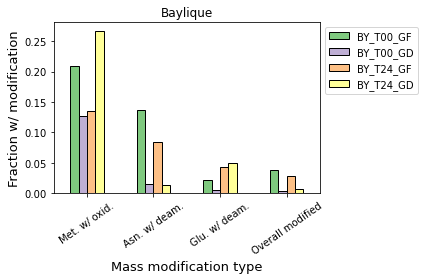

In [48]:
# plot mods across the dataset

BY_sum_ptm_s = BY_sum_ptm.drop(['sample'], axis=1)

ptm_BY_sumT = BY_sum_ptm_s.T

ptm_BY_sumT.columns = ['BY_T00_GF', 'BY_T00_GD', 'BY_T24_GF', 'BY_T24_GD']

four_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598']
six_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598', '#99d594', '#3288bd']
six_colors_q = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']
seven_colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']

fig = plt.figure(figsize = (10, 5)) 

ax = ptm_BY_sumT.iloc[1:11].plot(kind="bar", title = 'Baylique', \
                             color = seven_colors, edgecolor = 'black')

plt.xticks(rotation=35)

ax.set_ylabel('Fraction w/ modification', fontsize = 13)
ax.set_xlabel('Mass modification type', fontsize = 13)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
#legend.get_frame().set_edgecolor('1.0')

plt.tight_layout()

#plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/NAAF-digested-PTM-combined.png", dpi = 300)


In [51]:
ptm_MS_sumT.head(11)

MS_T00_GF  MS_T00_GD  MS_T24_GF  MS_T24_GD
Cys. w/ carb.      1.000000   1.000000   1.000000   1.000000
Met. w/ oxid.      0.686575   0.312601   0.148148   0.256142
Asn. w/ deam.      0.094981   0.230461   0.010817   0.031715
Glu. w/ deam.      0.057176   0.522221   0.034806   0.174783
Overall modified   0.130534   0.064196   0.011357   0.015620

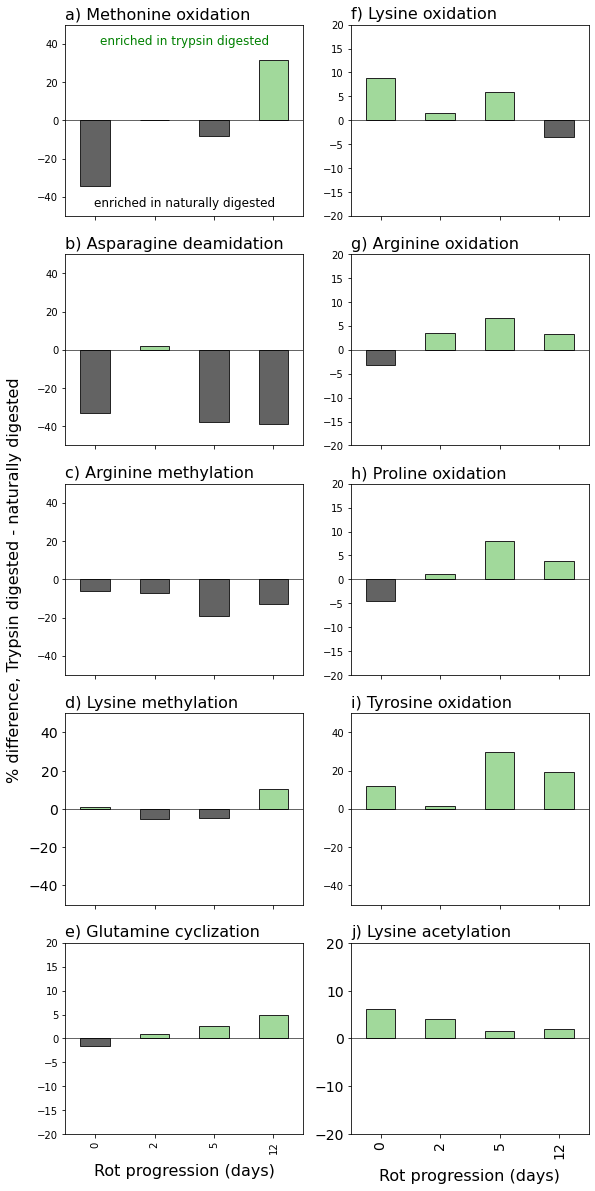

In [17]:
# PTM differential

diff = pd.concat([ptm_sumT, ptm_sumT_undig], axis=1)

diff['Day 0'] = (diff['T0'] - diff['T0 ud'])*100
diff['Day 2'] = (diff['T2'] - diff['T2 ud'])*100
diff['Day 5'] = (diff['T5'] - diff['T5 ud'])*100
diff['Day 12'] = (diff['T12'] - diff['T12 ud'])*100

# transpose and delete non diff columns

del diff['T0']
del diff['T2']
del diff['T5']
del diff['T12']

del diff['T0 ud']
del diff['T2 ud']
del diff['T5 ud']
del diff['T12 ud']

diff_plot = diff.T

# add column of Day #s
diff_plot['Day'] = [0, 2, 5, 12]

fig, axes = plt.subplots(figsize=(8, 16),nrows=5, ncols=2, sharex = True)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)

# 

axes[0,0].annotate('enriched in trypsin digested', xy=(0.5, 0.4), 
            xytext=(0.5, 0.95), textcoords='axes fraction',
            color='green', fontsize=12,
            horizontalalignment='center', verticalalignment='top'
            )

axes[0,0].annotate('enriched in naturally digested', xy=(0.5, 0.4), 
            xytext=(0.5, 0.1), textcoords='axes fraction',
            color='black', fontsize=12,
            horizontalalignment='center', verticalalignment='top'
            )


#  Methionine oxidation
diff_plot.plot(ax = axes[0,0], x="Day", y="Met. w/ oxid.", kind='bar', stacked=False, edgecolor = '#252525', \
              color=(diff_plot['Met. w/ oxid.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[0,0].set_title('a) Methonine oxidation', fontsize = 16, loc='left')
axes[0,0].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[0,0].get_legend().remove()
axes[0,0].set_ylim([-50, 50])


# Lysine oxidation
diff_plot.plot(ax = axes[0,1], x="Day", y="Lys. w/ oxid.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Lys. w/ oxid.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[0,1].set_title('f) Lysine oxidation', fontsize = 16, loc='left')
axes[0,1].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[0,1].get_legend().remove()
axes[0,1].set_ylim([-20, 20])

# Proline oxidation
diff_plot.plot(ax = axes[2,1], x="Day", y="Pro. w/ oxid.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Pro. w/ oxid.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[2,1].set_title('h) Proline oxidation', fontsize = 16, loc='left')
axes[2,1].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[2,1].get_legend().remove()
axes[2,1].set_ylim([-20, 20])

# Arginine oxidation
diff_plot.plot(ax = axes[1,1], x="Day", y="Arg. w/ oxid.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Arg. w/ oxid.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[1,1].set_title('g) Arginine oxidation', fontsize = 16, loc='left')
axes[1,1].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[1,1].get_legend().remove()
axes[1,1].set_ylim([-20, 20])

# Tyrosine oxidation
diff_plot.plot(ax = axes[3,1], x="Day", y="Tyr. w/ oxid.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Tyr. w/ oxid.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[3,1].set_title('i) Tyrosine oxidation', fontsize = 16, loc='left')
axes[3,1].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[3,1].get_legend().remove()
axes[3,1].set_ylim([-50, 50])

# Asparagine deamidation
diff_plot.plot(ax = axes[1,0], x="Day", y="Asn. w/ deam.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Asn. w/ deam.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[1,0].set_title('b) Asparagine deamidation', fontsize = 16, loc='left')
axes[1,0].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[1,0].get_legend().remove()
axes[1,0].set_ylim([-50, 50])

# Lysine methylation
diff_plot.plot(ax = axes[3,0], x="Day", y="Lys. w/ meth.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Lys. w/ meth.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[3,0].set_title('d) Lysine methylation', fontsize = 16, loc='left')
axes[3,0].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[3,0].get_legend().remove()
axes[3,0].set_ylim([-50, 50])
axes[3,0].tick_params(labelsize= 14)


# Arginine methylation
diff_plot.plot(ax = axes[2,0], x="Day", y="Arg. w/ meth.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Arg. w/ meth.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[2,0].set_title('c) Arginine methylation', fontsize = 16, loc='left')
axes[2,0].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[2,0].get_legend().remove()
axes[2,0].set_ylim([-50, 50])

# Label the y axes

axes[2,0].set_ylabel("% difference, Trypsin digested - naturally digested", fontsize = 16, labelpad = 15)

# Glutamine pyro-gluatmation
diff_plot.plot(ax = axes[4,0], x="Day", y="Glu. w/ pyro.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Glu. w/ pyro.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[4,0].set_title('e) Glutamine cyclization', fontsize = 16, loc='left')
axes[4,0].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[4,0].get_legend().remove()
axes[4,0].set_ylim([-20, 20])
axes[4,0].set_xlabel("Rot progression (days)", fontsize = 16, labelpad = 10)

# Lysine acetylation
diff_plot.plot(ax = axes[4,1], x="Day", y="Lys. w/ acet.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Lys. w/ acet.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[4,1].set_title('j) Lysine acetylation', fontsize = 16, loc='left')
axes[4,1].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[4,1].get_legend().remove()
axes[4,1].set_ylim([-20, 20])
axes[4,1].set_xlabel("Rot progression (days)", fontsize = 16, labelpad = 10)
axes[4,1].tick_params(labelsize= 14)


#plt.subplots_adjust(left=0.15, bottom=0.2)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.01)
plt.savefig('/home/millieginty/Documents/git-repos/rot-mayer/figures/fig4-ptms.png', dpi=400)

## 1. NAAF-adjusted amino acid composition 

### Combined DB and DN peptide AAs

In [53]:
# made this dataframe above
# it's just the digeseted peptides AAs
MS_sum_AA.head()

sample      A-NAAF      C-NAAF      D-NAAF      E-NAAF     F-NAAF  \
0   T0 0.3-0.7 um  859.878964  196.519166  154.584513  138.885880  51.320592   
1      T0 >0.7 um  891.345990   44.790374   70.798425  115.244996  42.215657   
2  T24 0.3-0.7 um  633.973435   26.280746    9.994564   33.399379  77.576323   
3     T24 >0.7 um  719.044837   25.895355   28.780109   25.126785  30.970944   

       G-NAAF      H-NAAF      I-NAAF      K-NAAF  ...      M-NAAF  \
0  198.524143   85.689246   39.364079   78.432194  ...  136.027979   
1  111.060918   71.096219  125.747650   83.907672  ...   58.035070   
2   98.419832  138.118882   21.575185  106.613832  ...   65.572484   
3   54.054334   47.438131   49.197527   37.744157  ...   37.446351   

       N-NAAF       P-NAAF     Q-NAAF       R-NAAF       S-NAAF       T-NAAF  \
0  390.980388  1109.732425  52.087657  1000.247294  1615.175427   971.200164   
1  199.315187  1122.613315  76.384513  1080.967510  1183.977462  1030.112471   
2  151.713931   925.460703  11.641517   817.941686   949.551751   886.265019   
3  189.804700   938.272669  12.228840   908.112388  1153.208945   943.911843   

        V-NAAF     W-NAAF     Y-NAAF  
0  1322.321664  15.022983  51.766661  
1  1916.474350  18.736159  36.330108  
2  1562.275072  13.333806  49.134515  
3  1623.304088   6.908795  25.394207  

[4 rows x 21 columns]

In [54]:
# sum all the AAs in each dataset, making a new column

MS_sum_AA['AA-Total-NAAF'] = MS_sum_AA['A-NAAF'] + MS_sum_AA['C-NAAF'] + MS_sum_AA['D-NAAF'] + MS_sum_AA['E-NAAF'] \
+ MS_sum_AA['F-NAAF'] + MS_sum_AA['G-NAAF'] + MS_sum_AA['H-NAAF'] + MS_sum_AA['K-NAAF'] + MS_sum_AA['I-NAAF'] + MS_sum_AA['L-NAAF'] \
+ MS_sum_AA['M-NAAF'] + MS_sum_AA['N-NAAF'] + MS_sum_AA['P-NAAF'] + MS_sum_AA['Q-NAAF'] + MS_sum_AA['R-NAAF'] \
+ MS_sum_AA['S-NAAF'] + MS_sum_AA['T-NAAF'] + MS_sum_AA['V-NAAF'] + MS_sum_AA['W-NAAF'] + MS_sum_AA['Y-NAAF'] \

# calculate the relative (NAAF-normalized) AA composition (fractions of AA total for each dataset)

MS_sum_AA['A_RelNAAF'] = MS_sum_AA['A-NAAF']/MS_sum_AA['AA-Total-NAAF']  #A
MS_sum_AA['C_RelNAAF'] = MS_sum_AA['C-NAAF']/MS_sum_AA['AA-Total-NAAF']  #C
MS_sum_AA['D_RelNAAF'] = MS_sum_AA['D-NAAF']/MS_sum_AA['AA-Total-NAAF']  #D
MS_sum_AA['E_RelNAAF'] = MS_sum_AA['E-NAAF']/MS_sum_AA['AA-Total-NAAF']  #E
MS_sum_AA['F_RelNAAF'] = MS_sum_AA['F-NAAF']/MS_sum_AA['AA-Total-NAAF']  #F
MS_sum_AA['G_RelNAAF'] = MS_sum_AA['G-NAAF']/MS_sum_AA['AA-Total-NAAF']  #G
MS_sum_AA['H_RelNAAF'] = MS_sum_AA['H-NAAF']/MS_sum_AA['AA-Total-NAAF']  #H
MS_sum_AA['K_RelNAAF'] = MS_sum_AA['K-NAAF']/MS_sum_AA['AA-Total-NAAF']  #K
MS_sum_AA['I/L_RelNAAF'] = (MS_sum_AA['I-NAAF'] + MS_sum_AA['L-NAAF'])/MS_sum_AA['AA-Total-NAAF']  #I/L
MS_sum_AA['M_RelNAAF'] = MS_sum_AA['M-NAAF']/MS_sum_AA['AA-Total-NAAF']  #M
MS_sum_AA['N_RelNAAF'] = MS_sum_AA['N-NAAF']/MS_sum_AA['AA-Total-NAAF']  #N
MS_sum_AA['P_RelNAAF'] = MS_sum_AA['P-NAAF']/MS_sum_AA['AA-Total-NAAF']  #P
MS_sum_AA['Q_RelNAAF'] = MS_sum_AA['Q-NAAF']/MS_sum_AA['AA-Total-NAAF']  #Q
MS_sum_AA['R_RelNAAF'] = MS_sum_AA['R-NAAF']/MS_sum_AA['AA-Total-NAAF']  #R
MS_sum_AA['S_RelNAAF'] = MS_sum_AA['S-NAAF']/MS_sum_AA['AA-Total-NAAF']  #S
MS_sum_AA['T_RelNAAF'] = MS_sum_AA['T-NAAF']/MS_sum_AA['AA-Total-NAAF']  #T
MS_sum_AA['V_RelNAAF'] = MS_sum_AA['V-NAAF']/MS_sum_AA['AA-Total-NAAF']  #V
MS_sum_AA['W_RelNAAF'] = MS_sum_AA['W-NAAF']/MS_sum_AA['AA-Total-NAAF']  #W
MS_sum_AA['Y_RelNAAF'] = MS_sum_AA['Y-NAAF']/MS_sum_AA['AA-Total-NAAF']  #Y

# make a smaller dataframe with just the relative, NAAF-normalized AA compositions
MS_sumrelAA = MS_sum_AA[['sample', 'A_RelNAAF', 'C_RelNAAF', 'D_RelNAAF', 'E_RelNAAF', 'F_RelNAAF', 'G_RelNAAF', 'H_RelNAAF', \
                      'K_RelNAAF', 'I/L_RelNAAF', 'M_RelNAAF', 'N_RelNAAF', 'P_RelNAAF', 'Q_RelNAAF', 'R_RelNAAF', \
                      'S_RelNAAF', 'T_RelNAAF', 'V_RelNAAF', 'W_RelNAAF', 'Y_RelNAAF']].copy()

#export as a csv

MS_sumrelAA.to_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/AA-comp/MS-RelNAAF-AAs.csv")

MS_sumrelAA.head(6)

sample  A_RelNAAF  C_RelNAAF  D_RelNAAF  E_RelNAAF  F_RelNAAF  \
0   T0 0.3-0.7 um   0.086777   0.019832   0.015600   0.014016   0.005179   
1      T0 >0.7 um   0.091952   0.004621   0.007304   0.011889   0.004355   
2  T24 0.3-0.7 um   0.083810   0.003474   0.001321   0.004415   0.010255   
3     T24 >0.7 um   0.090156   0.003247   0.003609   0.003150   0.003883   

   G_RelNAAF  H_RelNAAF  K_RelNAAF  I/L_RelNAAF  M_RelNAAF  N_RelNAAF  \
0   0.020035   0.008648   0.007915     0.149427   0.013728   0.039457   
1   0.011457   0.007334   0.008656     0.158885   0.005987   0.020562   
2   0.013011   0.018259   0.014094     0.133145   0.008669   0.020056   
3   0.006778   0.005948   0.004732     0.146433   0.004695   0.023798   

   P_RelNAAF  Q_RelNAAF  R_RelNAAF  S_RelNAAF  T_RelNAAF  V_RelNAAF  \
0   0.111991   0.005257   0.100943   0.163000   0.098011   0.133445   
1   0.115810   0.007880   0.111514   0.122141   0.106268   0.197706   
2   0.122344   0.001539   0.108130   0.125528   0.117162   0.206529   
3   0.117644   0.001533   0.113862   0.144593   0.118351   0.203536   

   W_RelNAAF  Y_RelNAAF  
0   0.001516   0.005224  
1   0.001933   0.003748  
2   0.001763   0.006495  
3   0.000866   0.003184

In [55]:
# sum all the AAs in each dataset, making a new column

MN_sum_AA['AA-Total-NAAF'] = MN_sum_AA['A-NAAF'] + MN_sum_AA['C-NAAF'] + MN_sum_AA['D-NAAF'] + MN_sum_AA['E-NAAF'] \
+ MN_sum_AA['F-NAAF'] + MN_sum_AA['G-NAAF'] + MN_sum_AA['H-NAAF'] + MN_sum_AA['K-NAAF'] + MN_sum_AA['I-NAAF'] + MN_sum_AA['L-NAAF'] \
+ MN_sum_AA['M-NAAF'] + MN_sum_AA['N-NAAF'] + MN_sum_AA['P-NAAF'] + MN_sum_AA['Q-NAAF'] + MN_sum_AA['R-NAAF'] \
+ MN_sum_AA['S-NAAF'] + MN_sum_AA['T-NAAF'] + MN_sum_AA['V-NAAF'] + MN_sum_AA['W-NAAF'] + MN_sum_AA['Y-NAAF'] \

# calculate the relative (NAAF-normalized) AA composition (fractions of AA total for each dataset)

MN_sum_AA['A_RelNAAF'] = MN_sum_AA['A-NAAF']/MN_sum_AA['AA-Total-NAAF']  #A
MN_sum_AA['C_RelNAAF'] = MN_sum_AA['C-NAAF']/MN_sum_AA['AA-Total-NAAF']  #C
MN_sum_AA['D_RelNAAF'] = MN_sum_AA['D-NAAF']/MN_sum_AA['AA-Total-NAAF']  #D
MN_sum_AA['E_RelNAAF'] = MN_sum_AA['E-NAAF']/MN_sum_AA['AA-Total-NAAF']  #E
MN_sum_AA['F_RelNAAF'] = MN_sum_AA['F-NAAF']/MN_sum_AA['AA-Total-NAAF']  #F
MN_sum_AA['G_RelNAAF'] = MN_sum_AA['G-NAAF']/MN_sum_AA['AA-Total-NAAF']  #G
MN_sum_AA['H_RelNAAF'] = MN_sum_AA['H-NAAF']/MN_sum_AA['AA-Total-NAAF']  #H
MN_sum_AA['K_RelNAAF'] = MN_sum_AA['K-NAAF']/MN_sum_AA['AA-Total-NAAF']  #K
MN_sum_AA['I/L_RelNAAF'] = (MN_sum_AA['I-NAAF'] + MN_sum_AA['L-NAAF'])/MN_sum_AA['AA-Total-NAAF']  #I/L
MN_sum_AA['M_RelNAAF'] = MN_sum_AA['M-NAAF']/MN_sum_AA['AA-Total-NAAF']  #M
MN_sum_AA['N_RelNAAF'] = MN_sum_AA['N-NAAF']/MN_sum_AA['AA-Total-NAAF']  #N
MN_sum_AA['P_RelNAAF'] = MN_sum_AA['P-NAAF']/MN_sum_AA['AA-Total-NAAF']  #P
MN_sum_AA['Q_RelNAAF'] = MN_sum_AA['Q-NAAF']/MN_sum_AA['AA-Total-NAAF']  #Q
MN_sum_AA['R_RelNAAF'] = MN_sum_AA['R-NAAF']/MN_sum_AA['AA-Total-NAAF']  #R
MN_sum_AA['S_RelNAAF'] = MN_sum_AA['S-NAAF']/MN_sum_AA['AA-Total-NAAF']  #S
MN_sum_AA['T_RelNAAF'] = MN_sum_AA['T-NAAF']/MN_sum_AA['AA-Total-NAAF']  #T
MN_sum_AA['V_RelNAAF'] = MN_sum_AA['V-NAAF']/MN_sum_AA['AA-Total-NAAF']  #V
MN_sum_AA['W_RelNAAF'] = MN_sum_AA['W-NAAF']/MN_sum_AA['AA-Total-NAAF']  #W
MN_sum_AA['Y_RelNAAF'] = MN_sum_AA['Y-NAAF']/MN_sum_AA['AA-Total-NAAF']  #Y

# make a smaller dataframe with just the relative, NAAF-normalized AA compositions
MN_sumrelAA = MN_sum_AA[['sample', 'A_RelNAAF', 'C_RelNAAF', 'D_RelNAAF', 'E_RelNAAF', 'F_RelNAAF', 'G_RelNAAF', 'H_RelNAAF', \
                      'K_RelNAAF', 'I/L_RelNAAF', 'M_RelNAAF', 'N_RelNAAF', 'P_RelNAAF', 'Q_RelNAAF', 'R_RelNAAF', \
                      'S_RelNAAF', 'T_RelNAAF', 'V_RelNAAF', 'W_RelNAAF', 'Y_RelNAAF']].copy()

#export as a csv

MN_sumrelAA.to_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/AA-comp/MN-RelNAAF-AAs.csv")

MN_sumrelAA.head(6)

sample  A_RelNAAF  C_RelNAAF  D_RelNAAF  E_RelNAAF  F_RelNAAF  \
0   T0 0.3-0.7 um   0.100699   0.001024   0.004374   0.005938   0.001531   
1      T0 >0.7 um   0.072288   0.006634   0.004624   0.009466   0.006683   
2  T24 0.3-0.7 um   0.088894   0.023346   0.004210   0.010155   0.010044   
3     T24 >0.7 um   0.084934   0.002809   0.003974   0.003851   0.002933   

   G_RelNAAF  H_RelNAAF  K_RelNAAF  I/L_RelNAAF  M_RelNAAF  N_RelNAAF  \
0   0.012378   0.002691   0.005038     0.166523   0.002760   0.027485   
1   0.015047   0.011278   0.011096     0.147892   0.009530   0.016819   
2   0.033097   0.013400   0.021354     0.132866   0.012743   0.024937   
3   0.008483   0.001873   0.005437     0.149951   0.002675   0.023894   

   P_RelNAAF  Q_RelNAAF  R_RelNAAF  S_RelNAAF  T_RelNAAF  V_RelNAAF  \
0   0.113370   0.007288   0.112323   0.147315   0.108715   0.177755   
1   0.116369   0.003125   0.110695   0.113888   0.118063   0.221635   
2   0.100536   0.010069   0.090467   0.120089   0.109274   0.173103   
3   0.112187   0.004931   0.113782   0.140319   0.114786   0.221249   

   W_RelNAAF  Y_RelNAAF  
0   0.000740   0.002052  
1   0.000943   0.003925  
2   0.010730   0.010687  
3   0.001022   0.000908

In [56]:
# sum all the AAs in each dataset, making a new column

CV_sum_AA['AA-Total-NAAF'] = CV_sum_AA['A-NAAF'] + CV_sum_AA['C-NAAF'] + CV_sum_AA['D-NAAF'] + CV_sum_AA['E-NAAF'] \
+ CV_sum_AA['F-NAAF'] + CV_sum_AA['G-NAAF'] + CV_sum_AA['H-NAAF'] + CV_sum_AA['K-NAAF'] + CV_sum_AA['I-NAAF'] + CV_sum_AA['L-NAAF'] \
+ CV_sum_AA['M-NAAF'] + CV_sum_AA['N-NAAF'] + CV_sum_AA['P-NAAF'] + CV_sum_AA['Q-NAAF'] + CV_sum_AA['R-NAAF'] \
+ CV_sum_AA['S-NAAF'] + CV_sum_AA['T-NAAF'] + CV_sum_AA['V-NAAF'] + CV_sum_AA['W-NAAF'] + CV_sum_AA['Y-NAAF'] \

# calculate the relative (NAAF-normalized) AA composition (fractions of AA total for each dataset)

CV_sum_AA['A_RelNAAF'] = CV_sum_AA['A-NAAF']/CV_sum_AA['AA-Total-NAAF']  #A
CV_sum_AA['C_RelNAAF'] = CV_sum_AA['C-NAAF']/CV_sum_AA['AA-Total-NAAF']  #C
CV_sum_AA['D_RelNAAF'] = CV_sum_AA['D-NAAF']/CV_sum_AA['AA-Total-NAAF']  #D
CV_sum_AA['E_RelNAAF'] = CV_sum_AA['E-NAAF']/CV_sum_AA['AA-Total-NAAF']  #E
CV_sum_AA['F_RelNAAF'] = CV_sum_AA['F-NAAF']/CV_sum_AA['AA-Total-NAAF']  #F
CV_sum_AA['G_RelNAAF'] = CV_sum_AA['G-NAAF']/CV_sum_AA['AA-Total-NAAF']  #G
CV_sum_AA['H_RelNAAF'] = CV_sum_AA['H-NAAF']/CV_sum_AA['AA-Total-NAAF']  #H
CV_sum_AA['K_RelNAAF'] = CV_sum_AA['K-NAAF']/CV_sum_AA['AA-Total-NAAF']  #K
CV_sum_AA['I/L_RelNAAF'] = (CV_sum_AA['I-NAAF'] + CV_sum_AA['L-NAAF'])/CV_sum_AA['AA-Total-NAAF']  #I/L
CV_sum_AA['M_RelNAAF'] = CV_sum_AA['M-NAAF']/CV_sum_AA['AA-Total-NAAF']  #M
CV_sum_AA['N_RelNAAF'] = CV_sum_AA['N-NAAF']/CV_sum_AA['AA-Total-NAAF']  #N
CV_sum_AA['P_RelNAAF'] = CV_sum_AA['P-NAAF']/CV_sum_AA['AA-Total-NAAF']  #P
CV_sum_AA['Q_RelNAAF'] = CV_sum_AA['Q-NAAF']/CV_sum_AA['AA-Total-NAAF']  #Q
CV_sum_AA['R_RelNAAF'] = CV_sum_AA['R-NAAF']/CV_sum_AA['AA-Total-NAAF']  #R
CV_sum_AA['S_RelNAAF'] = CV_sum_AA['S-NAAF']/CV_sum_AA['AA-Total-NAAF']  #S
CV_sum_AA['T_RelNAAF'] = CV_sum_AA['T-NAAF']/CV_sum_AA['AA-Total-NAAF']  #T
CV_sum_AA['V_RelNAAF'] = CV_sum_AA['V-NAAF']/CV_sum_AA['AA-Total-NAAF']  #V
CV_sum_AA['W_RelNAAF'] = CV_sum_AA['W-NAAF']/CV_sum_AA['AA-Total-NAAF']  #W
CV_sum_AA['Y_RelNAAF'] = CV_sum_AA['Y-NAAF']/CV_sum_AA['AA-Total-NAAF']  #Y

# make a smaller dataframe with just the relative, NAAF-normalized AA compositions
CV_sumrelAA = CV_sum_AA[['sample', 'A_RelNAAF', 'C_RelNAAF', 'D_RelNAAF', 'E_RelNAAF', 'F_RelNAAF', 'G_RelNAAF', 'H_RelNAAF', \
                      'K_RelNAAF', 'I/L_RelNAAF', 'M_RelNAAF', 'N_RelNAAF', 'P_RelNAAF', 'Q_RelNAAF', 'R_RelNAAF', \
                      'S_RelNAAF', 'T_RelNAAF', 'V_RelNAAF', 'W_RelNAAF', 'Y_RelNAAF']].copy()

#export as a csv

CV_sumrelAA.to_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/AA-comp/CV-RelNAAF-AAs.csv")

CV_sumrelAA.head(6)

sample  A_RelNAAF  C_RelNAAF  D_RelNAAF  E_RelNAAF  F_RelNAAF  \
0   T0 0.3-0.7 um   0.084137   0.012872   0.005704   0.007886   0.006989   
1      T0 >0.7 um   0.081667   0.002006   0.005797   0.008546   0.005753   
2  T24 0.3-0.7 um   0.089631   0.003694   0.001913   0.003321   0.003883   
3     T24 >0.7 um   0.092855   0.002007   0.002443   0.002288   0.001910   

   G_RelNAAF  H_RelNAAF  K_RelNAAF  I/L_RelNAAF  M_RelNAAF  N_RelNAAF  \
0   0.013445   0.012741   0.014644     0.139610   0.012495   0.021417   
1   0.009914   0.007359   0.004776     0.143524   0.003878   0.026520   
2   0.008105   0.005444   0.006542     0.140452   0.003586   0.019980   
3   0.004845   0.003017   0.003449     0.143886   0.002755   0.016152   

   P_RelNAAF  Q_RelNAAF  R_RelNAAF  S_RelNAAF  T_RelNAAF  V_RelNAAF  \
0   0.112595   0.004727   0.109000   0.133220   0.110561   0.190533   
1   0.114573   0.004057   0.113320   0.134599   0.116623   0.212413   
2   0.115884   0.006299   0.113825   0.135145   0.118381   0.218419   
3   0.119432   0.001264   0.117669   0.137942   0.123969   0.221745   

   W_RelNAAF  Y_RelNAAF  
0   0.003772   0.003651  
1   0.001468   0.003206  
2   0.001873   0.003624  
3   0.000670   0.001702

In [57]:
# sum all the AAs in each dataset, making a new column

BY_sum_AA['AA-Total-NAAF'] = BY_sum_AA['A-NAAF'] + BY_sum_AA['C-NAAF'] + BY_sum_AA['D-NAAF'] + BY_sum_AA['E-NAAF'] \
+ BY_sum_AA['F-NAAF'] + BY_sum_AA['G-NAAF'] + BY_sum_AA['H-NAAF'] + BY_sum_AA['K-NAAF'] + BY_sum_AA['I-NAAF'] + BY_sum_AA['L-NAAF'] \
+ BY_sum_AA['M-NAAF'] + BY_sum_AA['N-NAAF'] + BY_sum_AA['P-NAAF'] + BY_sum_AA['Q-NAAF'] + BY_sum_AA['R-NAAF'] \
+ BY_sum_AA['S-NAAF'] + BY_sum_AA['T-NAAF'] + BY_sum_AA['V-NAAF'] + BY_sum_AA['W-NAAF'] + BY_sum_AA['Y-NAAF'] \

# calculate the relative (NAAF-normalized) AA composition (fractions of AA total for each dataset)

BY_sum_AA['A_RelNAAF'] = BY_sum_AA['A-NAAF']/BY_sum_AA['AA-Total-NAAF']  #A
BY_sum_AA['C_RelNAAF'] = BY_sum_AA['C-NAAF']/BY_sum_AA['AA-Total-NAAF']  #C
BY_sum_AA['D_RelNAAF'] = BY_sum_AA['D-NAAF']/BY_sum_AA['AA-Total-NAAF']  #D
BY_sum_AA['E_RelNAAF'] = BY_sum_AA['E-NAAF']/BY_sum_AA['AA-Total-NAAF']  #E
BY_sum_AA['F_RelNAAF'] = BY_sum_AA['F-NAAF']/BY_sum_AA['AA-Total-NAAF']  #F
BY_sum_AA['G_RelNAAF'] = BY_sum_AA['G-NAAF']/BY_sum_AA['AA-Total-NAAF']  #G
BY_sum_AA['H_RelNAAF'] = BY_sum_AA['H-NAAF']/BY_sum_AA['AA-Total-NAAF']  #H
BY_sum_AA['K_RelNAAF'] = BY_sum_AA['K-NAAF']/BY_sum_AA['AA-Total-NAAF']  #K
BY_sum_AA['I/L_RelNAAF'] = (BY_sum_AA['I-NAAF'] + BY_sum_AA['L-NAAF'])/BY_sum_AA['AA-Total-NAAF']  #I/L
BY_sum_AA['M_RelNAAF'] = BY_sum_AA['M-NAAF']/BY_sum_AA['AA-Total-NAAF']  #M
BY_sum_AA['N_RelNAAF'] = BY_sum_AA['N-NAAF']/BY_sum_AA['AA-Total-NAAF']  #N
BY_sum_AA['P_RelNAAF'] = BY_sum_AA['P-NAAF']/BY_sum_AA['AA-Total-NAAF']  #P
BY_sum_AA['Q_RelNAAF'] = BY_sum_AA['Q-NAAF']/BY_sum_AA['AA-Total-NAAF']  #Q
BY_sum_AA['R_RelNAAF'] = BY_sum_AA['R-NAAF']/BY_sum_AA['AA-Total-NAAF']  #R
BY_sum_AA['S_RelNAAF'] = BY_sum_AA['S-NAAF']/BY_sum_AA['AA-Total-NAAF']  #S
BY_sum_AA['T_RelNAAF'] = BY_sum_AA['T-NAAF']/BY_sum_AA['AA-Total-NAAF']  #T
BY_sum_AA['V_RelNAAF'] = BY_sum_AA['V-NAAF']/BY_sum_AA['AA-Total-NAAF']  #V
BY_sum_AA['W_RelNAAF'] = BY_sum_AA['W-NAAF']/BY_sum_AA['AA-Total-NAAF']  #W
BY_sum_AA['Y_RelNAAF'] = BY_sum_AA['Y-NAAF']/BY_sum_AA['AA-Total-NAAF']  #Y

# make a smaller dataframe with just the relative, NAAF-normalized AA compositions
BY_sumrelAA = BY_sum_AA[['sample', 'A_RelNAAF', 'C_RelNAAF', 'D_RelNAAF', 'E_RelNAAF', 'F_RelNAAF', 'G_RelNAAF', 'H_RelNAAF', \
                      'K_RelNAAF', 'I/L_RelNAAF', 'M_RelNAAF', 'N_RelNAAF', 'P_RelNAAF', 'Q_RelNAAF', 'R_RelNAAF', \
                      'S_RelNAAF', 'T_RelNAAF', 'V_RelNAAF', 'W_RelNAAF', 'Y_RelNAAF']].copy()

#export as a csv

BY_sumrelAA.to_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/AA-comp/BY-RelNAAF-AAs.csv")

BY_sumrelAA.head(6)

sample  A_RelNAAF  C_RelNAAF  D_RelNAAF  E_RelNAAF  F_RelNAAF  \
0   T0 0.3-0.7 um   0.094113   0.004105   0.016742   0.016772   0.005416   
1      T0 >0.7 um   0.084200   0.001302   0.001619   0.002934   0.002740   
2  T24 0.3-0.7 um   0.076693   0.006128   0.001525   0.004894   0.008766   
3     T24 >0.7 um   0.084908   0.003825   0.003242   0.002154   0.003459   

   G_RelNAAF  H_RelNAAF  K_RelNAAF  I/L_RelNAAF  M_RelNAAF  N_RelNAAF  \
0   0.016723   0.010163   0.007544     0.150268   0.007069   0.027175   
1   0.004656   0.004242   0.002576     0.153479   0.002420   0.035172   
2   0.012688   0.016629   0.008423     0.133507   0.009433   0.020485   
3   0.008742   0.009079   0.004375     0.144311   0.006761   0.020856   

   P_RelNAAF  Q_RelNAAF  R_RelNAAF  S_RelNAAF  T_RelNAAF  V_RelNAAF  \
0   0.100039   0.009806   0.104286   0.126293   0.100670   0.194227   
1   0.114650   0.002652   0.114391   0.166538   0.117521   0.185256   
2   0.117847   0.002441   0.110319   0.123229   0.116366   0.217488   
3   0.119292   0.001840   0.115336   0.134041   0.126828   0.205933   

   W_RelNAAF  Y_RelNAAF  
0   0.003772   0.004819  
1   0.001160   0.002493  
2   0.003202   0.009936  
3   0.000816   0.004203

Text(0.5, 1.07, 'Macapa South')

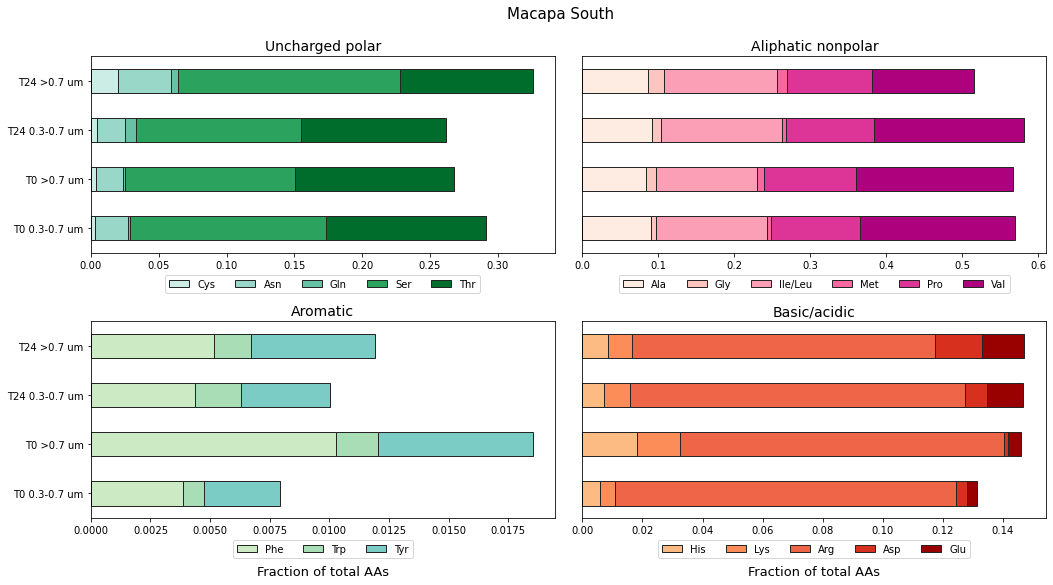

In [62]:
# plotting the NAAF-corrected AA compositions by residue type (charge, side group)
# order the horizontal bars by sample

sum_relAA_des = MS_sumrelAA.sort_values('sample',ascending=False)

col_up = '#ccece6', '#99d8c9', '#66c2a4', '#2ca25f', '#006d2c'
col_na = '#feebe2', '#fcc5c0', '#fa9fb5', '#f768a1', '#dd3497', '#ae017e'
col_ar = '#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e'
col_ba = '#fdbb84', '#fc8d59', '#ef6548', '#d7301f', '#990000'

# divide up the dataframe into 4 smaller dataframes based on AA class

# uncharged polar: cysteine, asparagine, glutamine, serine, threonine
up = sum_relAA_des[['sample', 'C_RelNAAF', 'N_RelNAAF', 'Q_RelNAAF', 'S_RelNAAF', 'T_RelNAAF']].copy()
up_names = ['sample', 'Cys', 'Asn', 'Gln', 'Ser', 'Thr']
up.columns = up_names

# nonpolar, aliphatic R-group: alanine, glycine, methionine, proline, valine
na = sum_relAA_des[['sample', 'A_RelNAAF', 'G_RelNAAF','I/L_RelNAAF', 'M_RelNAAF',\
                    'P_RelNAAF', 'V_RelNAAF']].copy()
na_names = ['sample', 'Ala', 'Gly', 'Ile/Leu', 'Met', 'Pro', 'Val']
na.columns = na_names

# aromatic R-group: phenylalanine, tryptophan, tyrosine
ar = sum_relAA_des[['sample', 'F_RelNAAF', 'W_RelNAAF', 'Y_RelNAAF']].copy() 
ar_names = ['sample', 'Phe', 'Trp', 'Tyr']
ar.columns = ar_names

# basic and acidic R-group: hisdiine, lysine, arginine, aspartic acid, glutamic acid
ba = sum_relAA_des[['sample', 'H_RelNAAF', 'K_RelNAAF', 'R_RelNAAF', 'D_RelNAAF', 'E_RelNAAF']].copy()
ba_names = ['sample', 'His', 'Lys', 'Arg', 'Asp', 'Glu']
ba.columns = ba_names

# plot AA comps

fig, axes = plt.subplots(figsize=(14, 7),nrows=2, ncols=2)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= 0.06, hspace= 0.35)

up.plot(ax=axes[0,0], x='sample', kind='barh', stacked=True, color = col_up, edgecolor = '#252525')
na.plot(ax=axes[0,1], x='sample', kind='barh', stacked=True, color = col_na, edgecolor = '#252525')
ar.plot(ax=axes[1,0], x='sample', kind='barh', stacked=True, color = col_ar, edgecolor = '#252525')
ba.plot(ax=axes[1,1], x='sample', kind='barh', stacked=True, color = col_ba, edgecolor = '#252525')

axes[0,0].set_title('Uncharged polar', fontsize = 14)
axes[0,0].set_ylabel("")
axes[0,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)
axes[0,0].set_yticklabels( ('T0 0.3-0.7 um', 'T0 >0.7 um', 'T24 0.3-0.7 um', 'T24 >0.7 um') )

axes[0,1].set_title('Aliphatic nonpolar', fontsize = 14)
axes[0,1].yaxis.set_ticks([])
axes[0,1].set_ylabel("")
axes[0,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=6)

axes[1,0].set_title('Aromatic', fontsize = 14)
axes[1,0].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,0].set_ylabel("")
axes[1,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=3)
axes[1,0].set_yticklabels( ('T0 0.3-0.7 um', 'T0 >0.7 um', 'T24 0.3-0.7 um', 'T24 >0.7 um') )

axes[1,1].set_title('Basic/acidic', fontsize = 14)
axes[1,1].yaxis.set_ticks([])
axes[1,1].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,1].set_ylabel("")
axes[1,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)

fig.suptitle('Macapa South', y = 1.07, size = 15)

# save figure in ptm-analyses dir
#plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/digested-DB+DN-AA-NAAFs.png", dpi = 300, bbox_inches='tight', transparent=True)

Text(0.5, 1.07, 'Macapa North')

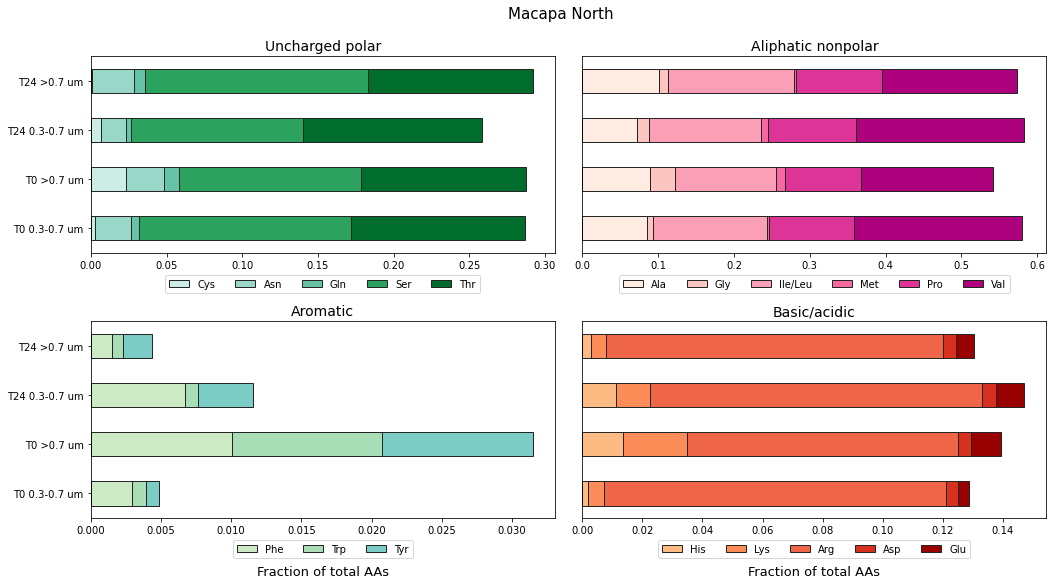

In [63]:
# plotting the NAAF-corrected AA compositions by residue type (charge, side group)
# order the horizontal bars by sample

sum_relAA_des = MN_sumrelAA.sort_values('sample',ascending=False)

col_up = '#ccece6', '#99d8c9', '#66c2a4', '#2ca25f', '#006d2c'
col_na = '#feebe2', '#fcc5c0', '#fa9fb5', '#f768a1', '#dd3497', '#ae017e'
col_ar = '#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e'
col_ba = '#fdbb84', '#fc8d59', '#ef6548', '#d7301f', '#990000'

# divide up the dataframe into 4 smaller dataframes based on AA class

# uncharged polar: cysteine, asparagine, glutamine, serine, threonine
up = sum_relAA_des[['sample', 'C_RelNAAF', 'N_RelNAAF', 'Q_RelNAAF', 'S_RelNAAF', 'T_RelNAAF']].copy()
up_names = ['sample', 'Cys', 'Asn', 'Gln', 'Ser', 'Thr']
up.columns = up_names

# nonpolar, aliphatic R-group: alanine, glycine, methionine, proline, valine
na = sum_relAA_des[['sample', 'A_RelNAAF', 'G_RelNAAF','I/L_RelNAAF', 'M_RelNAAF',\
                    'P_RelNAAF', 'V_RelNAAF']].copy()
na_names = ['sample', 'Ala', 'Gly', 'Ile/Leu', 'Met', 'Pro', 'Val']
na.columns = na_names

# aromatic R-group: phenylalanine, tryptophan, tyrosine
ar = sum_relAA_des[['sample', 'F_RelNAAF', 'W_RelNAAF', 'Y_RelNAAF']].copy() 
ar_names = ['sample', 'Phe', 'Trp', 'Tyr']
ar.columns = ar_names

# basic and acidic R-group: hisdiine, lysine, arginine, aspartic acid, glutamic acid
ba = sum_relAA_des[['sample', 'H_RelNAAF', 'K_RelNAAF', 'R_RelNAAF', 'D_RelNAAF', 'E_RelNAAF']].copy()
ba_names = ['sample', 'His', 'Lys', 'Arg', 'Asp', 'Glu']
ba.columns = ba_names

# plot AA comps

fig, axes = plt.subplots(figsize=(14, 7),nrows=2, ncols=2)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= 0.06, hspace= 0.35)

up.plot(ax=axes[0,0], x='sample', kind='barh', stacked=True, color = col_up, edgecolor = '#252525')
na.plot(ax=axes[0,1], x='sample', kind='barh', stacked=True, color = col_na, edgecolor = '#252525')
ar.plot(ax=axes[1,0], x='sample', kind='barh', stacked=True, color = col_ar, edgecolor = '#252525')
ba.plot(ax=axes[1,1], x='sample', kind='barh', stacked=True, color = col_ba, edgecolor = '#252525')

axes[0,0].set_title('Uncharged polar', fontsize = 14)
axes[0,0].set_ylabel("")
axes[0,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)
axes[0,0].set_yticklabels( ('T0 0.3-0.7 um', 'T0 >0.7 um', 'T24 0.3-0.7 um', 'T24 >0.7 um') )

axes[0,1].set_title('Aliphatic nonpolar', fontsize = 14)
axes[0,1].yaxis.set_ticks([])
axes[0,1].set_ylabel("")
axes[0,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=6)

axes[1,0].set_title('Aromatic', fontsize = 14)
axes[1,0].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,0].set_ylabel("")
axes[1,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=3)
axes[1,0].set_yticklabels( ('T0 0.3-0.7 um', 'T0 >0.7 um', 'T24 0.3-0.7 um', 'T24 >0.7 um') )

axes[1,1].set_title('Basic/acidic', fontsize = 14)
axes[1,1].yaxis.set_ticks([])
axes[1,1].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,1].set_ylabel("")
axes[1,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)

fig.suptitle('Macapa North', y = 1.07, size = 15)

# save figure in ptm-analyses dir
#plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/digested-DB+DN-AA-NAAFs.png", dpi = 300, bbox_inches='tight', transparent=True)

Text(0.5, 1.07, 'Chaves')

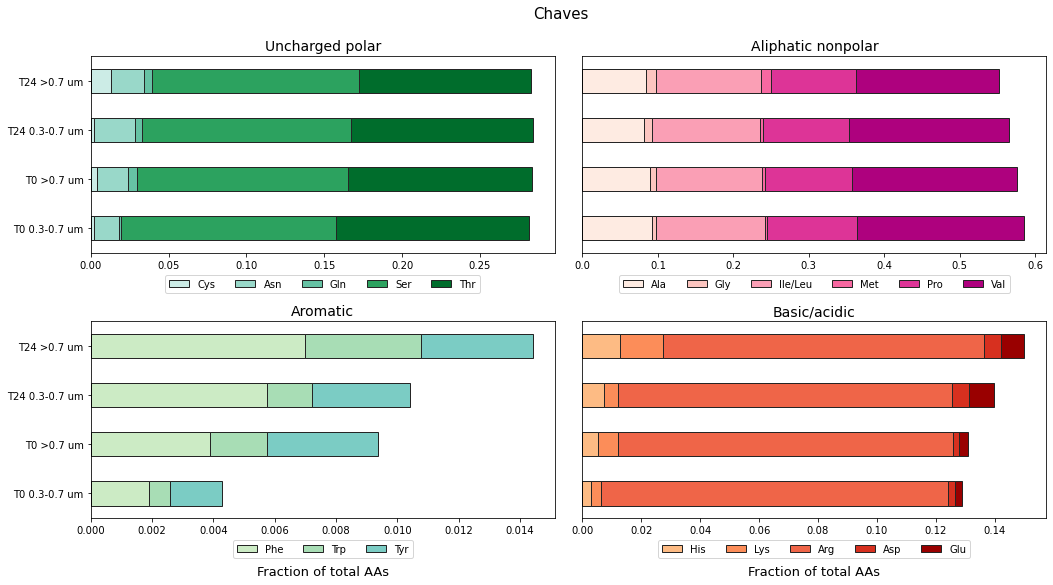

In [64]:
# plotting the NAAF-corrected AA compositions by residue type (charge, side group)
# order the horizontal bars by sample

sum_relAA_des = CV_sumrelAA.sort_values('sample',ascending=False)

col_up = '#ccece6', '#99d8c9', '#66c2a4', '#2ca25f', '#006d2c'
col_na = '#feebe2', '#fcc5c0', '#fa9fb5', '#f768a1', '#dd3497', '#ae017e'
col_ar = '#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e'
col_ba = '#fdbb84', '#fc8d59', '#ef6548', '#d7301f', '#990000'

# divide up the dataframe into 4 smaller dataframes based on AA class

# uncharged polar: cysteine, asparagine, glutamine, serine, threonine
up = sum_relAA_des[['sample', 'C_RelNAAF', 'N_RelNAAF', 'Q_RelNAAF', 'S_RelNAAF', 'T_RelNAAF']].copy()
up_names = ['sample', 'Cys', 'Asn', 'Gln', 'Ser', 'Thr']
up.columns = up_names

# nonpolar, aliphatic R-group: alanine, glycine, methionine, proline, valine
na = sum_relAA_des[['sample', 'A_RelNAAF', 'G_RelNAAF','I/L_RelNAAF', 'M_RelNAAF',\
                    'P_RelNAAF', 'V_RelNAAF']].copy()
na_names = ['sample', 'Ala', 'Gly', 'Ile/Leu', 'Met', 'Pro', 'Val']
na.columns = na_names

# aromatic R-group: phenylalanine, tryptophan, tyrosine
ar = sum_relAA_des[['sample', 'F_RelNAAF', 'W_RelNAAF', 'Y_RelNAAF']].copy() 
ar_names = ['sample', 'Phe', 'Trp', 'Tyr']
ar.columns = ar_names

# basic and acidic R-group: hisdiine, lysine, arginine, aspartic acid, glutamic acid
ba = sum_relAA_des[['sample', 'H_RelNAAF', 'K_RelNAAF', 'R_RelNAAF', 'D_RelNAAF', 'E_RelNAAF']].copy()
ba_names = ['sample', 'His', 'Lys', 'Arg', 'Asp', 'Glu']
ba.columns = ba_names

# plot AA comps

fig, axes = plt.subplots(figsize=(14, 7),nrows=2, ncols=2)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= 0.06, hspace= 0.35)

up.plot(ax=axes[0,0], x='sample', kind='barh', stacked=True, color = col_up, edgecolor = '#252525')
na.plot(ax=axes[0,1], x='sample', kind='barh', stacked=True, color = col_na, edgecolor = '#252525')
ar.plot(ax=axes[1,0], x='sample', kind='barh', stacked=True, color = col_ar, edgecolor = '#252525')
ba.plot(ax=axes[1,1], x='sample', kind='barh', stacked=True, color = col_ba, edgecolor = '#252525')

axes[0,0].set_title('Uncharged polar', fontsize = 14)
axes[0,0].set_ylabel("")
axes[0,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)
axes[0,0].set_yticklabels( ('T0 0.3-0.7 um', 'T0 >0.7 um', 'T24 0.3-0.7 um', 'T24 >0.7 um') )

axes[0,1].set_title('Aliphatic nonpolar', fontsize = 14)
axes[0,1].yaxis.set_ticks([])
axes[0,1].set_ylabel("")
axes[0,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=6)

axes[1,0].set_title('Aromatic', fontsize = 14)
axes[1,0].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,0].set_ylabel("")
axes[1,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=3)
axes[1,0].set_yticklabels( ('T0 0.3-0.7 um', 'T0 >0.7 um', 'T24 0.3-0.7 um', 'T24 >0.7 um') )

axes[1,1].set_title('Basic/acidic', fontsize = 14)
axes[1,1].yaxis.set_ticks([])
axes[1,1].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,1].set_ylabel("")
axes[1,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)

fig.suptitle('Chaves', y = 1.07, size = 15)

# save figure in ptm-analyses dir
#plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/digested-DB+DN-AA-NAAFs.png", dpi = 300, bbox_inches='tight', transparent=True)

Text(0.5, 1.07, 'Baylique')

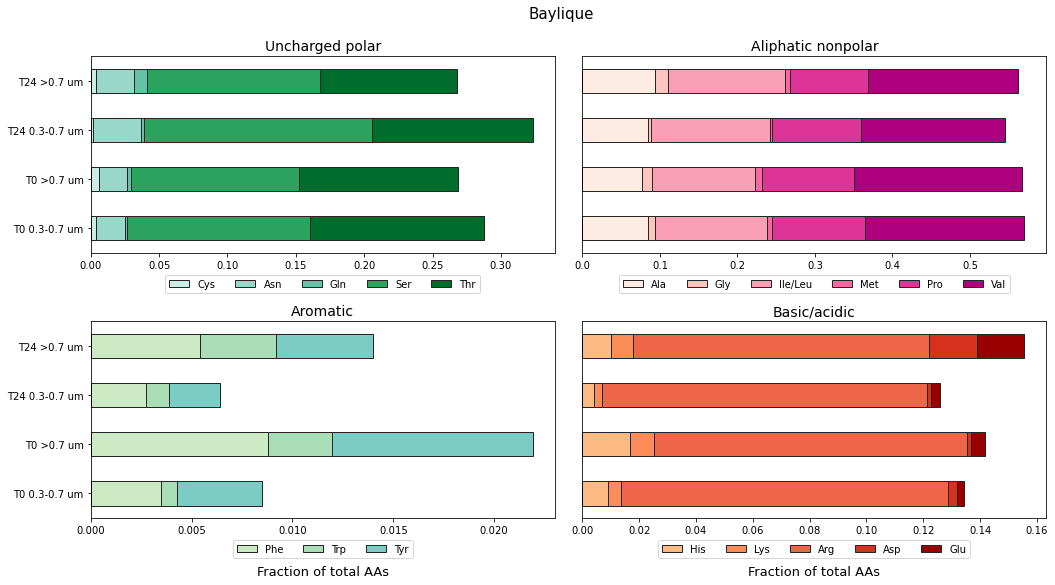

In [65]:
# plotting the NAAF-corrected AA compositions by residue type (charge, side group)
# order the horizontal bars by sample

sum_relAA_des = BY_sumrelAA.sort_values('sample',ascending=False)

col_up = '#ccece6', '#99d8c9', '#66c2a4', '#2ca25f', '#006d2c'
col_na = '#feebe2', '#fcc5c0', '#fa9fb5', '#f768a1', '#dd3497', '#ae017e'
col_ar = '#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e'
col_ba = '#fdbb84', '#fc8d59', '#ef6548', '#d7301f', '#990000'

# divide up the dataframe into 4 smaller dataframes based on AA class

# uncharged polar: cysteine, asparagine, glutamine, serine, threonine
up = sum_relAA_des[['sample', 'C_RelNAAF', 'N_RelNAAF', 'Q_RelNAAF', 'S_RelNAAF', 'T_RelNAAF']].copy()
up_names = ['sample', 'Cys', 'Asn', 'Gln', 'Ser', 'Thr']
up.columns = up_names

# nonpolar, aliphatic R-group: alanine, glycine, methionine, proline, valine
na = sum_relAA_des[['sample', 'A_RelNAAF', 'G_RelNAAF','I/L_RelNAAF', 'M_RelNAAF',\
                    'P_RelNAAF', 'V_RelNAAF']].copy()
na_names = ['sample', 'Ala', 'Gly', 'Ile/Leu', 'Met', 'Pro', 'Val']
na.columns = na_names

# aromatic R-group: phenylalanine, tryptophan, tyrosine
ar = sum_relAA_des[['sample', 'F_RelNAAF', 'W_RelNAAF', 'Y_RelNAAF']].copy() 
ar_names = ['sample', 'Phe', 'Trp', 'Tyr']
ar.columns = ar_names

# basic and acidic R-group: hisdiine, lysine, arginine, aspartic acid, glutamic acid
ba = sum_relAA_des[['sample', 'H_RelNAAF', 'K_RelNAAF', 'R_RelNAAF', 'D_RelNAAF', 'E_RelNAAF']].copy()
ba_names = ['sample', 'His', 'Lys', 'Arg', 'Asp', 'Glu']
ba.columns = ba_names

# plot AA comps

fig, axes = plt.subplots(figsize=(14, 7),nrows=2, ncols=2)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= 0.06, hspace= 0.35)

up.plot(ax=axes[0,0], x='sample', kind='barh', stacked=True, color = col_up, edgecolor = '#252525')
na.plot(ax=axes[0,1], x='sample', kind='barh', stacked=True, color = col_na, edgecolor = '#252525')
ar.plot(ax=axes[1,0], x='sample', kind='barh', stacked=True, color = col_ar, edgecolor = '#252525')
ba.plot(ax=axes[1,1], x='sample', kind='barh', stacked=True, color = col_ba, edgecolor = '#252525')

axes[0,0].set_title('Uncharged polar', fontsize = 14)
axes[0,0].set_ylabel("")
axes[0,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)
axes[0,0].set_yticklabels( ('T0 0.3-0.7 um', 'T0 >0.7 um', 'T24 0.3-0.7 um', 'T24 >0.7 um') )

axes[0,1].set_title('Aliphatic nonpolar', fontsize = 14)
axes[0,1].yaxis.set_ticks([])
axes[0,1].set_ylabel("")
axes[0,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=6)

axes[1,0].set_title('Aromatic', fontsize = 14)
axes[1,0].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,0].set_ylabel("")
axes[1,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=3)
axes[1,0].set_yticklabels( ('T0 0.3-0.7 um', 'T0 >0.7 um', 'T24 0.3-0.7 um', 'T24 >0.7 um') )

axes[1,1].set_title('Basic/acidic', fontsize = 14)
axes[1,1].yaxis.set_ticks([])
axes[1,1].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,1].set_ylabel("")
axes[1,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)

fig.suptitle('Baylique', y = 1.07, size = 15)

# save figure in ptm-analyses dir
#plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/digested-DB+DN-AA-NAAFs.png", dpi = 300, bbox_inches='tight', transparent=True)